In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth

In [2]:
#reading data
dataset = pd.read_csv("Groceries_dataset.csv")
#Member_number is unique for each customer. Date is date of the transaction,
#itemDescription is the product bought for this date.
print(dataset.head())
print(dataset.shape)
#################################
#checking missing values
nan_values = dataset.isna().sum()
print(nan_values)

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
(38765, 3)
Member_number      0
Date               0
itemDescription    0
dtype: int64


In [3]:
##Basket analysis: we can see the bought products of clients for every day
client_basket=dataset.groupby(['Member_number','Date'])['itemDescription'].apply(sum)
print(client_basket)
## we can see the bought products of clients for every day withot client number
clinet_basket2 = [a[1]['itemDescription'].tolist() for a in list(dataset.groupby(['Member_number','Date']))]
print(clinet_basket2[0:10])

Member_number  Date      
1000           15-03-2015           sausagewhole milksemi-finished breadyogurt
               24-06-2014                          whole milkpastrysalty snack
               24-07-2015                           canned beermisc. beverages
               25-11-2015                              sausagehygiene articles
               27-05-2015                               sodapickled vegetables
                                                   ...                        
4999           24-01-2015    tropical fruitberriesother vegetablesyogurtkit...
               26-12-2015                                   bottled waterherbs
5000           09-03-2014                          fruit/vegetable juiceonions
               10-02-2015               sodaroot vegetablessemi-finished bread
               16-11-2014                         bottled beerother vegetables
Name: itemDescription, Length: 14963, dtype: object
[['sausage', 'whole milk', 'semi-finished bread', 'yo

In [4]:
#Converting Date into datetime type
Date=dataset.set_index(['Date'])
Date.index=pd.to_datetime(Date.index, infer_datetime_format= True)

[Text(0.5, 0, 'Date')]

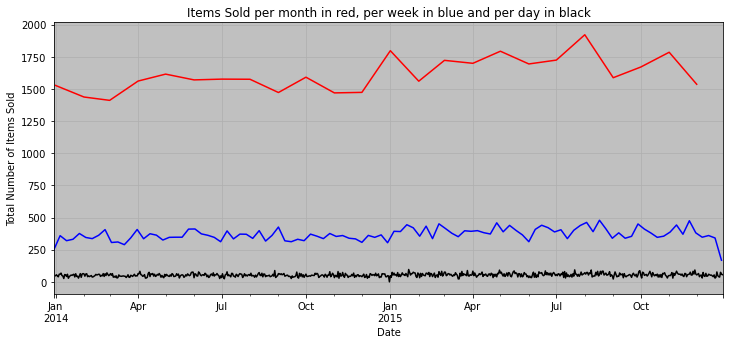

In [9]:

fig1 = plt.figure("Figure 1")
ax = plt.axes()
ax.set_facecolor('silver')
Date.resample("D")['itemDescription'].count().plot(figsize=(12,5), grid=True,
color='black').set(xlabel="Date", ylabel="Total Number of Items Sold")
Date.resample("W")['itemDescription'].count().plot(figsize=(12,5), grid=True,
color='blue').set(xlabel="Date", ylabel="Total Number of Items Sold")
Date.resample("M")['itemDescription'].count().plot(figsize=(12,5), grid=True,
color='red',title="Items Sold per month in red, per week in blue and per day in black").set(xlabel="Date") 

[Text(0.5, 0, '5')]

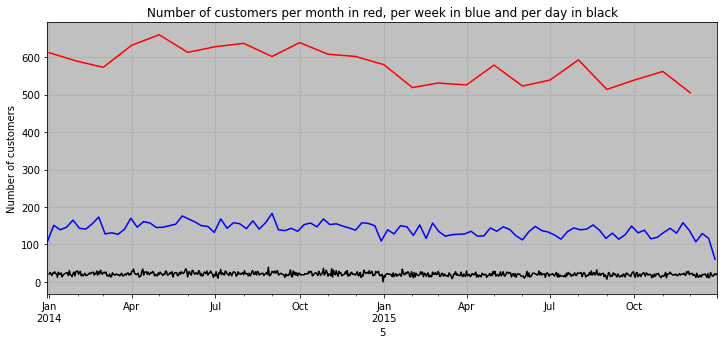

In [10]:
fig2 = plt.figure("Figure 2")
ax = plt.axes()
ax.set_facecolor('silver')
Date.resample('D')['Member_number'].nunique().plot(figsize=(12,5), grid=True,
color='black').set(xlabel="Date", ylabel="Number of customers")
Date.resample('W')['Member_number'].nunique().plot(figsize=(12,5), grid=True,
color='blue').set(xlabel="Date", ylabel="Number of customers")
Date.resample('M')['Member_number'].nunique().plot(figsize=(12,5), grid=True,
color='red',title="Number of customers per month in red, per week in blue and per day in black").set(xlabel=5)

In [ ]:
#sale per customer
fig3 = plt.figure("Figure 3")
ax = plt.axes()
day_ratio = Date.resample("D")['itemDescription'].count()/Date.resample('D')['Member_number'].nunique()
day_ratio.plot(figsize=(12,5), grid=True,
color='black').set(xlabel="Date", ylabel="Sale per customer")
week_ratio = Date.resample("W")['itemDescription'].count()/Date.resample('W')['Member_number'].nunique()
week_ratio.plot(figsize=(12,5), grid=True,
color='blue').set(xlabel="Date", ylabel="Sale per customer")
month_ratio = Date.resample("M")['itemDescription'].count()/Date.resample('M')['Member_number'].nunique()
month_ratio.plot(figsize=(12,5), grid=True,
color='red', title = "Sale per customers per month in red, per week in blue and per day in black").set(xlabel="D)

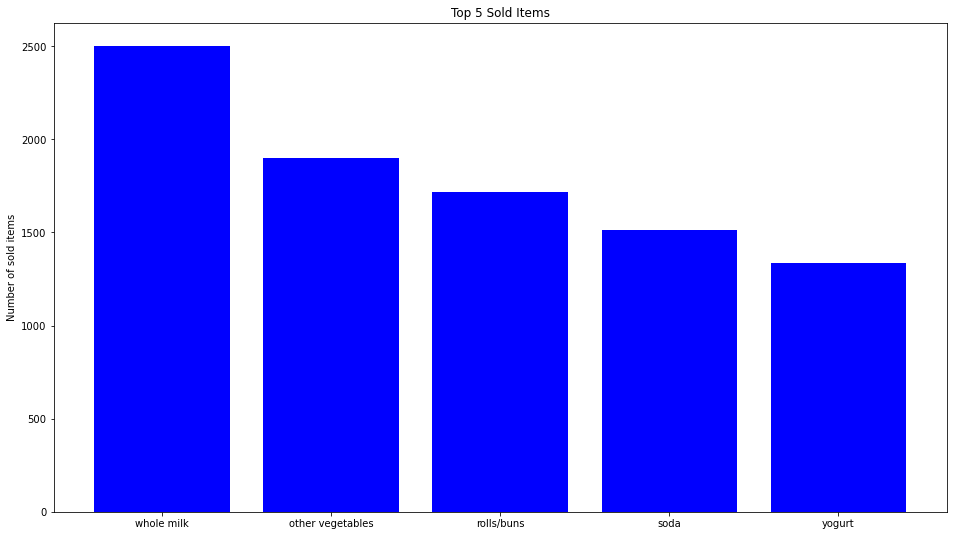

In [8]:
#5 best seller items 
Item_distr = dataset.groupby(by = 'itemDescription').size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(5)
bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))
plt.figure(figsize=(16,9))
plt.bar(x_pos, height, color = 'blue')
plt.title("Top 5 Sold Items")
plt.ylabel("Number of sold items")
plt.xticks(x_pos, bars)
plt.show()